## Chapter 3 - Linear Regression - Notes

This notebook contains the data imports and my interpretation of the plots from the Chapter 3 of ISL. I also added few notes related to the theory, and few methods to ease the plotting.

* [3.1 - Simple Linear Regression](#sim_lin_reg)
* &ensp;&ensp;[3.1.1 - Estimating the Coefficient](#est_coef)
* [3.2 - Multiple Linear Regression](#mult_lin_reg)
* [3.3 - Other Considerations in the Regression Model](#other_cons)
* &ensp;&ensp;[3.3.2 - Extensions of the Linear Model](#ext_lin)
* &ensp;&ensp;[3.3.3 - Potential Problems](#pot_prob)


__Standard imports:__

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

<a id='sim_lin_reg'></a>

### 3.1 - Simple Linear Regression

Simple linear regression assumes that there is approximately a linear relationship between the predictor X and the quantitative response Y.

\begin{equation*}
Y \approx \beta_0 + \beta_1X \;\;\;\;\;\;\;\;\;\;(3.1)
\end{equation*}

$\beta_0$ and $\beta_1$ , intercept and slope, together are known as the models coefficient parameters. Once we estimate $\beta_0$ and $\beta_1$, we can predict future values:

\begin{equation*}
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x \;\;\;\;\;\;\;\;\;\;(3.2)
\end{equation*}

$\hat{y}$ - prediction of $Y$ on basis $X = x$.

<a id='est_coef'></a>

### 3.1.1 - Estimating the Coefficient

Given $(x_1, y_1), (x_2, y_2),..., (x_n, y_n)$ represent n observation pairs, each of which consist of a measurement of X and Y. The goal is to obtain coefficient estimates of $\hat{\beta_0}$ and $\hat{\beta_0}$ so that linear model _(3.1)_ fits the data well. The most common approach involves minimizing the __least squares__ criterion.

Let $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$ be the prediction for Y based on the $i$th value of X, and $e_i = y_i - \hat{y_i}$ represent the $i$th __residual__ (observed - predicted).

The __Residual Sum of Squares (RSS)__:

\begin{equation*}
RSS = e_{1}^2 + e_{2}^2 + \dots + e_{n}^2,
\end{equation*}

or, 

\begin{equation*}
RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1}x_1)^2 + (y_2 - \hat{\beta_0} - \hat{\beta_1}x_2)^2 + \dots + (y_n - \hat{\beta_0} - \hat{\beta_1}x_n)^2 \;\;\;\;\;\;\;\;\;\;(3.3)
\end{equation*}

The least squares approach chooses $\hat{\beta_0} + \hat{\beta_1}$ to minimize the RSS:

\begin{equation*}
\hat{\beta_1} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}, \\
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}, \;\;\;\;\;\;\;\;\;\;(3.4)
\end{equation*}

where $\bar{y} \equiv \frac{1}{n}\sum_{i=1}^ny_i$ and $\bar{x} \equiv \frac{1}{n}\sum_{i=1}^nx_i$ are the sample means.

In [2]:
# Loading 'Advertising' data
advertising = pd.read_csv('Data/Advertising.csv', usecols=(1, 2, 3, 4))

# Checking the import
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Using __scikit-learn__ to quickly estimate the intercept and slope:

In [4]:
# Single predictor variable X, and a quantitative response Y
X = advertising[['TV']]
y = advertising['sales']

In [5]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Instantiating the model
model = LinearRegression()

# Fitting the model and printing the values
model.fit(X, y)
print('Intercept: {0:.4f} \nSlope: {1:10.4f}'.format(model.intercept_, model.coef_[0]))

Intercept: 7.0326 
Slope:     0.0475


<br><br>
__FIGURE 3.1.__ For the __Advertising__ data, the least squares fit for the regression of __sales__ onto __TV__ is shown.

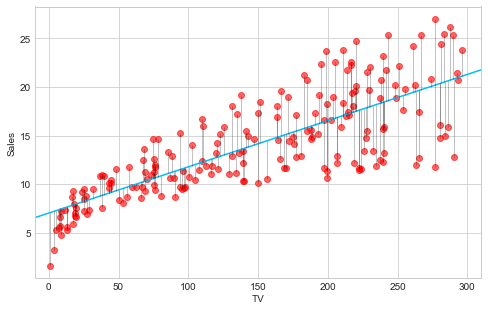

In [6]:
fig, ax = plt.subplots(figsize = (8, 5))

# Scatter plot of Sales ontoTV data
ax.scatter(X, y, alpha=0.6, c='r')

# Plotting the least square fit for the regression of Sales onto TV
x_line = np.arange(-10, 320, 1)
ax.plot(x_line, model.intercept_ + model.coef_[0] * x_line, c='deepskyblue')

# Predicting the values using the model
y_hat = model.intercept_ + model.coef_[0] * X['TV']

# Plotting ei - ith residual line for every i in range X
for i in np.arange(len(X)):
    ax.plot([X.iloc[i], X.iloc[i]], [y.iloc[i], y_hat.iloc[i]], c='k', alpha=0.4, lw=0.6)

# Labels and plot limits
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_xlim(-10, 310);

<br><br>
__TABLE 3.1.__ For the __Advertising__ data, coefficients of the least squares model for the regression of number of units sold on TV advertising budget. Using statsmodels library for the similar output.

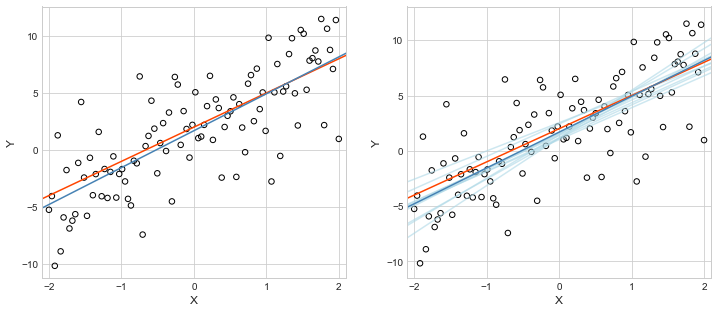

In [7]:
# Defining the figure size size and the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Random seed for data reproducibility
np.random.seed(2)

# Generating the X values
X = np.linspace(-2, 2, 100)

# Y values with errors generated from a normal distribution
Y = 2 + 3 * X + 3 * np.random.randn(100)

# Calculating the true relationship
X_line = np.linspace(-2.5, 2.5, 150)
Y_line = 2 + 3 * X_line

# Calculating the least square coefficients
b_1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
b_0 = Y.mean() - b_1 * X.mean()

# Calculating the least squares estimate
Y_ls = b_0 + b_1 * X_line


# For the Right Plot:
# Empty lists for storing the coefficients for every random sample
b0_list = []
b1_list = []

# Creating a DataFrame from X and Y values to draw random samples
merged_data = pd.DataFrame({'X': X, 'Y': Y})

for i in range(10):
    # Taking a random sample from the data
    sample_df = merged_data.sample(30)
    
    X_s = sample_df['X']
    Y_s = sample_df['Y']
    
    # Calculating the coefficients for the sample
    b_1_s = np.sum((X_s - X_s.mean()) * (Y_s - Y_s.mean())) / np.sum((X_s - X_s.mean()) ** 2)
    b_0_s = Y_s.mean() - b_1_s * X_s.mean()
    
    # The least square estimate for the random sample
    Y_ls_s = b_0_s + b_1_s * X_line
    
    # Plotting the ls estimate
    ax2.plot(X_line, Y_ls_s, c='lightblue', alpha=0.6)
    
    # Appending coefficients of the sample to a list
    b0_list.append(b_0_s)
    b1_list.append(b_1_s)
    
# Plotting on both plots
for ax in (ax1, ax2):
    # Scatter plot of the data
    ax.scatter(X, Y, s=30, edgecolor='k', facecolor='None')
    # The true relationship
    ax.plot(X_line, Y_line, c='orangered')
    # The least square estimate
    ax.plot(X_line, Y_ls, c='steelblue')
    
    # Setting extra parameters for the plots
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_xticks(np.arange(-2, 2.1))
    ax.set_xlim(-2.1, 2.1);

In [8]:
# Creating a DataFrame from two lists
coefficients = pd.DataFrame({'b0': b0_list, 'b1': b1_list})
print('Average of intercepts: {0:6.2f} \nAverage of slopes: {1:10.2f}'
      .format(coefficients['b0'].mean(), coefficients['b1'].mean()))

Average of intercepts:   1.54 
Average of slopes:       3.26


In [ ]:
# Importing the needed module
import statsmodels.formula.api as smf

# Linear model and printing the summary table
lm = smf.ols('sales~TV', data=advertising).fit()
print(lm.summary())

__RSE (Residual standard error)__ is an estimate of the standard deviation of error. It is not provided in the __statsmodels__ table. Below equation calculates the RSE.

\begin{equation*}
RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^{n} \Bigl(y_i - f(x_i) \Bigr)^2}
\end{equation*}

If the predictions obtained by model ($\hat{y}$) are very close to the true outcome values, then RSE will be small, concluding that the model fits the data very well. 

In [ ]:
# Calculating RSS
ssRes = np.sum((y - y_hat)**2)

# Calculating RSE
rse = np.sqrt(ssRes / (len(y) - 2))

# Printing RSE
print('Residual standard error: {:.2f}'.format(rse))

In [ ]:
ex1 = 1/(len(advertising['TV']) - 2)
ex2 = advertising['TV'].mean()
ex3 = np.sum((advertising['TV'] - ex2) ** 2)            
std_err_b_z = rse * (ex1 + (ex2 / ex3))
std_err_b_z

In [ ]:
se_b1 = rse / ex3
se_b1

__R-squared (coefficient of determination)__ measures how well the observed values of the response variables are predicted by the model. For a linear model the values are in the range of 0 to 1. The value close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. The value of 1 indicates that the regression line perfectly fits the data.

\begin{equation*}
R^2 = 1 - \frac {SS_{res}}{SS_{tot}}
\end{equation*}

<a id='mult_lin_reg'></a>

#### 3.2 - Multiple Linear Regression

In [ ]:
# Multiple predictors variable X, and a quantitative response Y
X = advertising[['TV', 'radio', 'newspaper']]
y = advertising['sales']

# Fitting the model and printing the coefficients
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

<br><br>
__TABLE 3.4.__ Multiple linear regression information on __Advertising__ data.

In [ ]:
# Multiple linear regression model, and printing the summary table
lm = smf.ols('sales ~ TV + radio + newspaper', data=advertising).fit()
print(lm.summary())

<br><br>
__TABLE 3.5.__ Correlation matrix for __TV, radio, newspaper,__ and __sales__ for the __Advertising__ data.

In [ ]:
# Computing pairwise correlation of columns, using pandas corr() function, and assigning to a variable
corr = advertising.corr()

# Using seaborn's heatmap function for the correlation matrix
sns.heatmap(corr, square=True, annot=True, cbar=False, cmap='Blues', linewidths=0.5);

<a id='other_cons'></a>

#### 3.3 - Other Considerations in the Regression Model

In [ ]:
# Loading 'Credit' data
credit = pd.read_csv('Data/Credit.csv', usecols=list(np.arange(1, 12)))
credit.head()

<br><br>
__FIGURE 3.6.__ The __Credit__ data set contains information about __balance, age, cards, education, income, limit,__ and __rating__ for a number of potential customers.

In [ ]:
# Using seaborn's pairplot function
sns.pairplot(credit[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']],
            plot_kws=dict(alpha=0.8));

<br><br>
__TABLE 3.7.__ Least squares coefficient estimates associated with the regression of __balance__ onto __gender__ in the __Credit__ data set.

In [ ]:
est = smf.ols('Balance~Gender', credit).fit()
print(est.summary().tables[1])

<br><br>
__TABLE 3.8.__ Least squares coefficient estimates associated with the regression of __balance__ onto __ethnicity__ in the __Credit__ data set.

In [ ]:
est = smf.ols('Balance~Ethnicity', credit).fit()
print(est.summary().tables[1])

<a id='ext_lin'></a>

#### 3.3.2 - Extensions of the Linear Model

__TABLE 3.9.__ For the __Advertising__ data, least squares coefficient estimates associated with the regression of sales onto __TV__ and __radio__, with an interaction term.

In [ ]:
lm = smf.ols('sales ~ TV + radio + (TV * radio)', data=advertising).fit()
print(lm.summary().tables[1])

#### Non-linear relationship

Now we are going to look at the __Auto.csv__ data set. The data set has missing horsepower values, indicated by '?'. Also the values are in the string format. The code shown below imports the data, removes the rows containing '?', and transforms the type to __int__.

In [ ]:
auto = pd.read_csv('Data/Auto.csv')
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(int)
auto.head()

<br><br>
__FIGURE 3.8.__ The __Auto__ data set. The linear regression fit, second-degree polynomials fit, and fifth-degree polynomials fit.

In [ ]:
plt.scatter(auto['horsepower'], auto['mpg'], facecolors='None', edgecolors='k', label=None)
sns.regplot(auto['horsepower'], auto['mpg'], ci=None, color='orangered', label='Linear', scatter=False)
sns.regplot(auto['horsepower'], auto['mpg'], ci=None, color='deepskyblue', label='Degree 2', order=2, scatter=False)
sns.regplot(auto['horsepower'], auto['mpg'], ci=None, color='seagreen', label='Degree 5', order=5, scatter=False)

plt.ylabel('Miles per gallon')
plt.xlim(np.min(auto['horsepower']), np.max(auto['horsepower']))
plt.ylim(np.min(auto['mpg']), np.max(auto['mpg']))

# Adding the legend
custom_legend = plt.legend(frameon=True)
custom_legend.get_frame().set_edgecolor('k');

<br><br>
__TABLE 3.10.__ Least squares coefficient estimates associated with the regression of __mpg__ onto __horsepower__ and __horsepower2__.

In [ ]:
lm_auto_poly = smf.ols('mpg~horsepower + I(horsepower ** 2.0)', data=auto).fit()
print(lm_auto_poly.summary().tables[1])

<a id='pot_prob'></a>

#### 3.3.3 - Potential Problems

There is a great article on [Medium](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034), by Emre Can, recreating the R plots in Python. Below codes are slight modifications of the tutorial.

__R__ produces 4 different plots:
* __Residuals vs. Fitted plot__:

__Fitted__ - the prediction of X values with the slope and intercept of the model.

__Residual__ - the difference between the actual value and the predicted by the model.

In [ ]:
def res_vs_fit(x, y):
    sns.residplot(x, y, lowess=True, scatter_kws={'alpha': 0.8}, 
                  line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
    
    plt.xlabel('Fitted')
    plt.ylabel('Residuals');

* __Normal Q-Q plot__:

Normal Q-Q (quantile-quantile) plot shows if the data came from a theoretical distribution such as a Normal or exponential. If the line formed by the scatterplot is roughly straight then both sets of quantiles come from Normal distributions ([Detailed explanation](http://data.library.virginia.edu/understanding-q-q-plots/)).

In [ ]:
def qq_plot(x):
    from statsmodels.graphics.gofplots import ProbPlot
    QQ = ProbPlot(x)
    QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plt.ylabel('Standardized Residuals');

* __Scale-Location plot__:

Scale-Location plot shows if residuals are spread equally along the ranges of predictors.

In [ ]:
def scale_location(x, y):
    plt.scatter(x, y, alpha=0.8)
    sns.regplot(x, y, scatter=False, ci=False, lowess=True,
                line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
    
    plt.xlabel('Fitted')
    plt.ylabel('Sq-rt Standardized Residuals');

* __Residual vs. Leverage__:

This plot shows if any outliers have influence over the regression fit. The outliers can dramatically impact the model when the cases are outside of the Cook's distance.

In [ ]:
def leverage_vs_res_std(x, y):
    plt.scatter(x, y, alpha=0.8, label=None)
    sns.regplot(x, y, scatter=False, ci=False, lowess=True,
                line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

    plt.xlim(np.min(x), np.max(x))
    plt.ylim(np.min(y), np.max(y))
    plt.xlabel('Leverage')
    plt.ylabel('Standardized Residuals')

    # shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(lm.params) # number of model parameters

    graph(lambda t: np.sqrt((0.5 * p * (1 - t)) / t), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line

    graph(lambda t: np.sqrt((1 * p * (1 - t)) / t), 
          np.linspace(0.001, 0.200, 50)) # 1 line

    plt.legend(loc='upper right');

I am using __scikit-learn__ for the regression fit in the following examples (first for the linear regression, and second for the second-degree polynomials).

In [ ]:
# Instantiating the linear regression (from scikit-learn) and fitting the data
lr_auto = LinearRegression()

X = auto[['horsepower']]
y = auto['mpg']

lr_auto.fit(X, y)

# Defining variables for the Residuals vs. Fitted plot
fitted = lr_auto.predict(X)
residuals = y - fitted

In [ ]:
# Instantiating PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias = False)

# Transforming X to second-degree polynomial
X_poly = poly.fit_transform(X)

# Fitting the model with transformed X
lr_auto_poly = LinearRegression()
lr_auto_poly.fit(X_poly, y)

# Defining variables for the Residuals vs. Fitted plot
fitted_poly = lr_auto_poly.predict(X_poly)
residuals_poly = y - fitted_poly

#### 1. Non-linearity of the Data

__FIGURE 3.9.__ Plots of residuals vs. fitted values for the __Auto__ data set. Left plot shows a non-linearity in the data. Right plot shows that quadratic term improves the fit to the data (little pattern in the residuals).

In [ ]:
plt.figure(figsize=(11, 5))

# Left plot
plt.subplot(1, 2, 1)
plt.title('Residual Plot for Linear Fit')
res_vs_fit(fitted, residuals)

# Right plot
plt.subplot(1, 2, 2)
plt.title('Residual Plot for Quadratic Fit')
res_vs_fit(fitted_poly, residuals_poly)

#### 5. High Leverage Points

__FIGURE 3.14.__ Scatterplots of the observations from the __Credit__ data set. Left: A plot of __age__ versus __limit__. These two variables are not collinear. Right: A plot of __rating__ versus __limit__. There is high collinearity.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

x = credit['Limit']

# Left plot
ax[0].scatter(x, credit['Age'], facecolors='None', edgecolors='r')
ax[0].set_ylabel('Age')

# Right plot
ax[1].scatter(x, credit['Rating'], facecolors='None', edgecolors='r')
ax[1].set_ylabel('Rating')

for ax in fig.axes:
    ax.set(xlabel='Limit',
           xticks=[2000,4000,6000,8000,12000]);

#### 6. Collinearity

As it is mentioned in [JWarmenhoven](http://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%203.ipynb#Figure-3.2---Regression-coefficients---RSS) notebook, contour plots shown in this chapter are using centered data for being visually more appealing. We can still plot the contour plots without centering them.

In [ ]:
X1_reg = credit[['Age', 'Limit']]
X2_reg = credit[['Rating', 'Limit']]

y = credit['Balance']

model_reg_1 = LinearRegression()
model_reg_2 = LinearRegression()

model_reg_1.fit(X1_reg, y)
model_reg_2.fit(X2_reg, y)

print('Model 1 intercept: {}'.format(model_reg_1.intercept_))
print('Model 1 coefficient: {}'.format(model_reg_1.coef_))

print('\nModel 2 intercept: {}'.format(model_reg_2.intercept_))
print('Model 2 coefficient: {}'.format(model_reg_2.coef_))

In [ ]:
xx1 = np.linspace(model_reg_1.coef_[1] - 0.02, model_reg_1.coef_[1] + 0.02, 100)
yy1 = np.linspace(model_reg_1.coef_[0] - 2, model_reg_1.coef_[0] + 2, 100)

xx2 = np.linspace(model_reg_2.coef_[1] - 0.2, model_reg_2.coef_[1] + 0.2, 100)
yy2 = np.linspace(model_reg_2.coef_[0] - 2, model_reg_2.coef_[0] + 2, 100)

X1, Y1 = np.meshgrid(xx1, yy1)
X2, Y2 = np.meshgrid(xx2, yy2)

Z1 = np.zeros((xx1.size, yy1.size))
Z2 = np.zeros((xx2.size, yy2.size))

# RSS = (y-yhat)**2
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =np.sum((y - (model_reg_1.intercept_ + X1[i,j]*credit['Limit'] + Y1[i,j]*credit['Age']))**2)/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =np.sum((y - (model_reg_2.intercept_ + X2[i,j]*credit['Limit'] + Y2[i,j]*credit['Rating']))**2)/1000000

<br><br>
__FIGURE 3.15.__ Contour plots for the RSS values as a function of the parameters β for various regressions involving the __Credit__ data set.

In [ ]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
  
# Left plot
contour = ax1.contour(X1, Y1, Z1, colors='navy', linewidths=0.5, levels=[21.25, 21.5, 21.8])
ax1.scatter(model_reg_1.coef_[1], model_reg_1.coef_[0], c='k')
ax1.plot(((model_reg_1.coef_[1] - 0.02), model_reg_1.coef_[1], model_reg_1.coef_[1]), 
         (model_reg_1.coef_[0], model_reg_1.coef_[0], (model_reg_1.coef_[0] - 2)), '--k', alpha=0.6)
ax1.clabel(contour, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=16)

# Right plot
contour = ax2.contour(X2, Y2, Z2, colors='navy', linewidths=0.5, levels=[21.5, 21.8])
ax2.scatter(model_reg_2.coef_[1], model_reg_2.coef_[0], c='k')
ax2.plot(((model_reg_2.coef_[1] - 0.2), model_reg_2.coef_[1], model_reg_2.coef_[1]), 
         (model_reg_2.coef_[0], model_reg_2.coef_[0], (model_reg_2.coef_[0] - 2)), '--k', alpha=0.6)
ax2.clabel(contour, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=16)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=16)

<br><br>
__TABLE 3.11.__ The results for two multiple regression models involving the __Credit__ data set are shown.

In [ ]:
lm1 = smf.ols('Balance ~ Age + Limit', data=credit).fit()
lm2 = smf.ols('Balance ~ Rating + Limit', data=credit).fit()

print(lm1.summary().tables[1])
print(lm2.summary().tables[1])

A better way to assess multicollinearity is to compute __variance inflation factor (VIF)__.

\begin{equation*}
VIF(\hat{\beta}_j) = \frac {1}{1 - R^2_{X_j|X_{-j}}}
\end{equation*}

The smallest value for VIF is 1, indicating complete absence of collinearity. VIF exceeding 5 or 10 indicates problematic amount of collinearity.

In [ ]:
lm1_vif = smf.ols('Age ~ Rating + Limit', data=credit).fit()
lm2_vif = smf.ols('Limit ~ Age + Rating', data=credit).fit()
lm3_vif = smf.ols('Rating ~ Age + Limit', data=credit).fit()

print('VIF 1 = {:.2f}'.format(1 / (1 - lm1_vif.rsquared)))
print('VIF 2 = {:.2f}'.format(1 / (1 - lm2_vif.rsquared)))
print('VIF 3 = {:.2f}'.format(1 / (1 - lm3_vif.rsquared)))